In [22]:
import numpy as np
import matplotlib.pyplot as plt

file = '../resource/dataset.txt'

def loadDataSet(filename):
    dataMat = []
    labelMat = []
    data = open(filename)
    for line in data.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

# sigmoid func
def sigmoid(x):
    return 1.0/(1+exp(-x))

def gradAscent(dataMat, labelMat):
    dataMatrix = mat(dataMat)
    classLabels = mat(labelMat).transpose()
    m,n = shape(dataMatrix)
    alpha = 0.01
    maxCycles = 500
    weights = ones((n,1))

    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (classLabels - h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights


def plotBestFit(weights, dataMat, labelMat):
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax  = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

def main():
    dataMat, labelMat = loadDataSet(file)
    weights = gradAscent(dataMat, labelMat).getA()
    plotBestFit(weights, dataMat, labelMat)

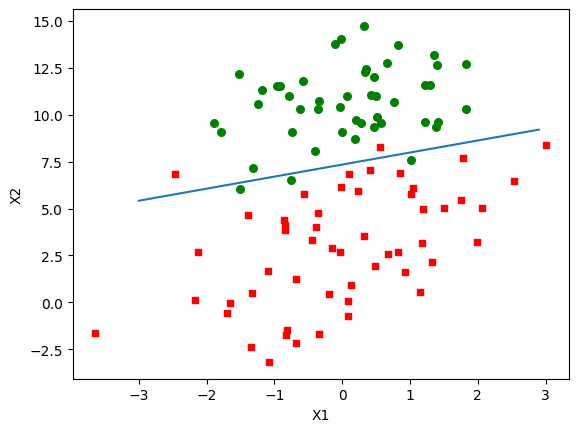

In [23]:
main()